# Project Phase 5: Citi Bike Distribution in New York City 

<img src="../images/e.png" width="1000" height="60"></img>

This project aims to answer the question **How well does Citi Bike represent NYC demographics? (in 2017)**. 

#### Team Members 
- Seonghee Lee (sl994) 
- Nicholas Rahardja (nmr73)
- Chelsea Choi (cc2583)

#### Team Github
- https://github.com/shljessie/citibike-nyc

#### Team Raw Data Google Drive 
- https://drive.google.com/drive/folders/197_d1BwPHXmVuyKA6I7UEyEw4Nqo8dAk 

#### Team Final Data Google Drive 
- https://drive.google.com/drive/folders/1glgD5ly1ABej2GDXzc-iUMjpu4HkItwa?usp=sharing
<br/> 

_______________


## Contents of this Notebook

1. Introduction
2. Data Description 
3. Pre Registration Statement 
4. Data Analysis 
5. Evaluation of Significance 
6. Interpretation and Conclusion
7. Limitations 
8. Source Code
9. Acknowledgement 
10. Appendix 
<br/> 

_______________

## 1) Introduction

1. Context of Work
2. Research Question
3. Main Findings
4. Summary of Results


#### 1. Context of Work

Bike sharing comes with many benefits such as providing free or affordable access to bicycles for short-distance trips. By doing so in an urban area, this reduces congestion, noise, and air pollution. 

However **whether or not these bike sharing systems are truly accessible for all is questionable.** Since the accessibility of these bike sharing systems depend heavily on where the stations are located, it is very likely that where you live becomes the deciding factor in whether or not you will be able to use these bikes. In addition to this, other factors such as the condition of roads and price of usage may be factors that prohibit people from actively using Citi Bikes.

In coming up with our research question, we looked at many research papers on bike sharing system equity. 
For example, a [study done by Portland State University](https://trec.pdx.edu/research/project/884) suggests that significant portions of the population are underrepresented among bike share users, including people of color, along with lower-income, female, older adults and less-educated groups. An [article in 2017](https://usa.streetsblog.org/2017/07/05/whats-keeping-people-from-using-bike-share-new-study-breaks-it-down-by-race-and-income/) finds that this may be due to the fact that these low-income communities and people of color view traffic risk, high prices, and the potential for crime and harassment as the biggest barriers to cycling and using bike-share in their neighborhoods. There has also been [data visualization research at MIT](https://aberke.github.io/income-race-bikes/) about how bikes are being distributed in NYC throughout the years in accordance to race&income.

In this project, we are looking closer into how these findings on bike sharing applies to New York City. We have chosen Citi Bike as the bike sharing platform which we will analyze since Citi Bike is the predominant bike sharing platform in NYC. In this project, **we look into how Citi Bike stations are distributed in NYC** and how that relates to the following factors: 1) race & income and  2) Citi Bike usage. Are there more stations in areas of higher usage regardless of race and income? Does race and income seem to have an unignorable correlation with how Citi Bike stations are being distributed? How much of these factors play into the distribution of Citi Bike? How might Citi Bike station distribution be improved? These are the questions we will ask and attempt to answer throughout this project.
 
Through gaining insight on how Citi Bike stations are distributed in NYC, we will also attempt to reccommend ways in which Citi Bike can improve there distribution of stations to better reflect usage in NYC across all of the race and income demographics. 

#### 2. Research Question

How is Citi Bike representing NYC demographics? (in 2017).

Here **NYC demographics** will refer to **Race&Income of NYC** and the **usages of Citi Bike trips**.

On the other hand, **Citi Bike representation** will refer to the the distribution of stations.

#### 3. Project Design + Limitations 

We are specificially looking at **NYC Citi Bike trip data in 2017 as a sample** of the representation of NYC bike stations around New York. We chose New York City's Citi Bike system since New York City is an area where there are widely varying levels of income. 
We chose 2017 for two reasons,    1) NYC's race and income data was available for the years 2013 -2018 and 2) 2017 was a year when many new stations of Citi Bike where added to represent its overall usage.
We decided that 2017 would be a fair representation of how Citi Bike stations were distributed throughout NYC.

We chose geoid as our standard for breaking up NYC into different geographical areas, since a geoid is the unique indentifier for a census tract, and a census tract is the smallest geographic region which the US goverment collects race and income data on during its annual Census. A census tract is roughly equivalent to a neighborhood, and they generally encompass a population between 2500 to 8000 people. 
<a href="https://popfactfinder.planning.nyc.gov/#11.77/40.7438/-73.99">This link </a> has more information on geoids and the visual size of them on a map.

#### 4. Main Findings

##### Are Citi Bike Stations distributed by Demand?
> To study

We found that as of 2017, Citi Bike has primarily placed bike stations in areas that are predominantly white and wealthy. In doing so, Citi Bike has neglected to account for the needs of predominantly asian and black neighborhoods in NYC.

#### 5. Summary of Results
- We found that census tracts with a high number of stations actually had a lower number of trips. 
- We found that white and high income areas had a high number of stations
- We found that white areas have a high number of stations to meet demand
- We found that asian and black neighborhoods do not have enough stations to meet their current demand.
<br/> 

_______________

In [1]:
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt 
import datetime as dt
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import r2_score
import statsmodels.api as sm
import statsmodels.formula.api as smf

## 2) Data Description 

For this project we used 3 different data sets. 
1. Citibike Trip Data
2. Citibike Station Data
3. NYC Race and Income Data

The data cleaning process of these data are <a href="https://github.com/shljessie/citibike-nyc/tree/master/data_cleaning">linked here</a>

### Dataset 1: Citibike Trip Data

In [2]:
# trips_df = pd.read_csv('../data/citibike_trip_final.csv')
# print('Number of Rows: {}'.format(trips_df.shape[0]))
# print('Number of Columns: {}'.format(trips_df.shape[1]))
# trips_df.head()

##### 1. What are the observations (rows) and the attributes (columns)?
Each observation in this data set corresponds to a trip taken on Citibike in 2017. The following are the features that are recorded for each trip: 
- start_time: Datetime object for the start time and date of the trip
- stop_time: Datetime object for the end time and date of the trip
- start_station_name: Name of starting station of the trip, a string
- end_station_name: Name of ending station of the trip, a string
- birth_year: Year user was born, an integer
- gender: (Zero=unknown; 1=male; 2=female)
- trip_minutes: Duration of the trip in minutes, an integer
- start_station_geoid: Unique identifier for the census tract that the trip started in, an integer
- end_station_geoid: Unique identifier for the census tract that the trip ended in, an integer. 

##### 2. Why was this dataset created?

This dataset was created to help developers, engineers, statisticians, artists, academics and the local public to explore the usage of citi bike around New York City. Insights from these findings would help citibike officials find answers to questions like where citibike users ride, how far they go,and what stations are the most popular. It is an open dataset on the public bike sharing system of New York City. It is open to the public to help people find insights about this system.

##### 3. Who funded the creation of the dataset?

This citibike data was funded by citibike in New York. Lyft is the operator of the Citi Bike program in New York City and Jersey City. The raw dataset was collected from this source https://www.citibikenyc.com/system-data 

##### 4.What processes might have influenced what data was observed and recorded and what was not?

Trips that may have been taken by staff who are managing citibike throughout the city are not good representations of citibikes trips by users only. Bikes may have been relocated overnight so that the distribution of bikes around the city are evenly distributed. Also bikes that may have been broken may lead to a loss of data.  Also citibike usage trip data is not a complete representation of all bike rider data in New York. 

##### 5. What preprocessing was done, and how did the data come to be in the form that you are using?

We dropped columns that we would not be using in our analysis, and also removed rows that had NaN values in them. Furthermore, since the original trips dataset was very large we chose to only consider trips taken by users who are citibike subscribers, in order to reduce the size of the dataset. Deciding to only keep trip data for subscribers also makes sense since, more then 90% of the original trips were taken by subscribers, so removing trips taken by non-subscribers (tourists and onetime users) should not have resulted in any significant loss of data. We have also dropped trips that were over 3 hours. The reason for this is because we wanted to be looking at regular users of citibike. If you keep a bike out for longer than 30 minutes at a time, regardless of the type, it's $0.18 per minute. According to citibike website in 2017 (https://www.citibikenyc.com/pricing/single-ride). Therefore using a citibike for unreasonably long hours of time even if you are a subscriber would be unreasonable since you are being charged. For this analysis we decided to set 3 hours as the limit to a reasonable amount of time,  a person who regularly uses a citibike would ride.  The original table has spaces in its column names, so we decided to change these with underscores to make the more friendly for computation. 

##### 6. If people are involved, were they aware of the data collection and if so, what purpose did they expect the data to be used for?

In signing up for using citibike, these users are allowing for citibike to take data of their usage. 
Citibike releases information about the user’s ride and trip duration  including their start station, usertype(Subscriber, one time user), gender, and year of birth. Citibike plans on using this data to understand citi bike users and the overall trend of citi bike users in new york city. Though many citibike users might not have been aware of this, they could have assumed that the data was collected to understand the citibike users for business related reasons.

##### 7. Where can your raw source data be found, if applicable? Provide a link to the raw data (hosted in a Cornell Google Drive or Cornell Box). 

https://drive.google.com/drive/folders/11YUr4yiiFKCNlN2MnGPGpCeXyrq92A0Z?usp=sharing



### Dataset 2 : Citibike Stations Data

In [3]:
stations_df = pd.read_csv('../data/citibike_stations_final.csv')
print('Number of Rows: {}'.format(stations_df.shape[0]))
print('Number of Columns: {}'.format(stations_df.shape[1]))
stations_df.head()

Number of Rows: 839
Number of Columns: 10


,station_id,station_name,lat,lon,first_trip,last_trip,geoid,trips_starting_here_2017,trips_ending_here_2017,total_trips_2017
0,254.0,W 11 St & 6 Ave,40.735324,-73.998004,2013-06-01,2019-07-31,36061006300,141183,143935,285118
1,252.0,MacDougal St & Washington Sq,40.732264,-73.998522,2013-06-01,2019-07-31,36061006300,141183,143935,285118
2,253.0,W 13 St & 5 Ave,40.735439,-73.994539,2013-06-01,2018-10-31,36061006300,141183,143935,285118
3,345.0,W 13 St & 6 Ave,40.736494,-73.997044,2013-06-01,2018-10-31,36061006300,141183,143935,285118
4,151.0,Cleveland Pl & Spring St,40.721816,-73.997203,2013-06-01,2019-07-31,36061004100,121704,118537,240241


##### 1. What are the observations (rows) and the attributes (columns)?

Each observation in this data set corresponds to a unique Citi Bike station in NYC. The following are the features for each station that is collected in this dataset: 

- station_id: Unique identifier for a station, an integer
- station_name: Name of the station, a string 
- lat: Latitude of the station, a float
- lon: Longitude of the station, a float 
- first_trip: Date of the first trip ever taken from the station, DateTime object 
- last_trip: Date of the last trip taken from the station (at the time this data set was downloaded), DateTime object
- geoid: Unique identifier for the NYC census tract that the station is located in, an integer 
- trips_starting_here_2017: number of trips taken from this station in 2017, an integer 
- trips_ending_here_2017: number of trips ending at this station in 2017, an integer
- total_trips_2017: total number of trips taken to and from this station in 2017, an integer

##### 2. Why was this dataset created?

The base dataset for this table came from the same source as the Citbike trip data set described above. However, more processing was done to this data to obtain this station dataset by a team of MIT researchers who were trying to map out the locations of Citi Bike stations in NYC for their research purposes. 

##### 3. Who funded the creation of the dataset?

This table uses as its base table the Cibike trip data set that was funded by citibike in New York. However, the processing that was done to this raw citi bike data was done by MIT researchers, so it can be assumed that MIT indirectly funded the creation of this Citibike trip data set. MIT Media Lab research: https://github.com/aberke/income-race-bikes/tree/master/data/nyc-bike


##### 4.What processes might have influenced what data was observed and recorded and what was not?

A small number of stations are located on the boundary between two census tracts, in which case we decided to select the first census tract returned by the API. 

##### 5. What preprocessing was done, and how did the data come to be in the form that you are using?

The original citibike station data, was already well formatted, but did not include the geoid which we needed to identify, which geographic location does the station belong to. To obtain this geoid for each station, we used an API to obtain the geoid corresponding to the census tract that the station is located in. Next since our project focuses on 2017, we removed all stations that had its first trip after 2017 since this means that these stations were made after 2017, and thus are not relevant to our analysis. Furthermore, the original dataset had the number of trips from each station calculated up to 2019, thus we removed this column and used the trip dataset to calculate the number of trips taken to and from each station in 2017. We also renamed a few columns to make their names more intuitive such as renaming ‘id’ to ‘station_id’ and ‘name’ to ‘station_name’. 
Currently this station dataset doesn't exclude stations that are located in parks. But when we use this data alongside the race/income data of NYC the geoids of the parks (so the stations that are located in parks)are naturally removed because the census data of race/income does not look at a census of a park. 

##### 6. If people are involved, were they aware of the data collection and if so, what purpose did they expect the data to be used for?

Since this data set is derived from the citi bike trips dataset, citi bike users were made aware that citibike would be tracking their usage data, when users signed up for the application. 

The expected usage of this data is the same as for the Citi Bike trip data above. 


##### 7. Where can your raw source data be found, if applicable? Provide a link to the raw data (hosted in a Cornell Google Drive or Cornell Box). 

https://drive.google.com/file/d/1pATvzg-PTpPvs_8x5pKIs_jqlbKrWyat/view?usp=sharing


### Dataset 3 : NYC Race and Income Data in 2017

In [4]:
race_income_df = pd.read_csv('../data/race_and_income_final.csv')
print('Number of Rows: {}'.format(race_income_df.shape[0]))
print('Number of Columns: {}'.format(race_income_df.shape[1]))
race_income_df.head()

Number of Rows: 4787
Number of Columns: 8


,geoid,2017_median_income,2017_population,2017_white_population,2017_black_population,2017_asian_population,2017_other_population,2017_2_or_more_races
0,36001000100,27250,1939,502,1142,16,112,167
1,36001000200,24091,4731,710,3474,104,32,411
2,36001000300,33454,5558,2589,1539,559,291,580
3,36001000401,74255,2459,2183,131,92,28,25
4,36001000403,70815,4695,3256,714,416,79,230


##### 1. What are the observations (rows) and the attributes (columns)?

Each observation in this data set corresponds to a different census tract in NYC. A census tract is the smallest geographical area, defined by the US goverment, which census data is collected on. For each census tract the following are the attributes in the dataset. 

- geoid: Unique identifier for the census tract that the station is located in, an integer 
- 2017_median_income: Median income (dollars) in the census tract in 2017, an integer
- 2017_population: Total population in the census tract in 2017, an integer
- 2017_white_population: Total number of White individuals in the census tract, an integer
- 2017_black_population: Total number of Black individuals in the census tract, an integer
- 2017_asian_population: Total number of Asian individuals in the census tract, an integer
- 2017_2_or_more_races : Total number of individuals who identify as two or more races in the census tract, an integer

##### 2. Why was this dataset created?

This dataset was created in order to study the census tract data along with the associated race and income in that tract from 2017. This was done by extracting the household median income and household race from the American Community Survey. 

##### 3. Who funded the creation of the dataset?

This data was created and funded by the United States Census bureau. ACS: https://data.census.gov/cedsci/The creation of this dataset was funded by the MIT Media Lab. MIT Media Lab : https://github.com/aberke/income-race-bikes/blob/master/data/ny/race_and_income_data.csv.

##### 4. What processes might have influenced what data was observed and recorded and what was not?

The American Community Survey’s data collection process is performed by randomly selecting 3.5 million addresses to reply to the survey in order to represent the entire population. Because this survey is limited to those with addresses, there may be households and individuals who are not recorded in the census. For example, the homeless population is difficult to track and therefore could influence the data as well. 

##### 5. What preprocessing was done, and how did the data come to be in the form that you are using?
Because the original data from the American Community Survey was downloaded as a shapefile, the data had to be extracted and transformed into a dataframe. After extracting the race, income, and renaming the columns, the data set was created. 

Next, we dropped rows where the median income was missing or had NaN values. Furthermore for census tracts that had median income values of '$250,000+' we changed the median income value to '250,000' so that they can be treated as a numeric value. Laslty, we only kept the race and income data for 2017 and dropped all the other columns which correspond to the other years. 

##### 6. If people are involved, were they aware of the data collection and if so, what purpose did they expect the data to be used for?
The individuals contacted were aware of the data collection. In the constitution, it states that a census must be taken every 10 years. People likely understand the main purpose of the census as determining where federal and state funding should be spent. Moreover, their data is protected from being shared and used by any other government agency. 

##### 7. Where can your raw source data be found, if applicable? Provide a link to the raw data (hosted in a Cornell Google Drive or Cornell Box). 
https://drive.google.com/file/d/1obfrrDul07XDXEvyK6kf-N66_2K5-g88/view?usp=sharing
<br> 

_________

## 3) Preregistration Statement 

#### Research Question: How is citibike representing NYC demographics?

>In our research question NYC demographics refers to  **1) the usage of citibike** and **2) the race and income of NYC**


#### Analysis 1: What is the relationship between Citibike trips and number of stations in a census tract?

>This analysis idea is intended to explore the relationship between citibike usage (trips) and the number of stations in a geoid. Here we are mainly attempting to answer the question **"Are there more stations in areas of higher usage?"**
We will check through graphs to explore what the relationship between trips and stations look like and confirm the relationship/absence of a relationship through **Linear Regression** and statistical findings.
Additionally we will be looking more closely at geoids with many stations but low amount of trips to see what may have caused an increased amount of stations in those areas.

       
#### Analysis 2: How is station placement by geoid representing NYC race & income demographics? (Stations vs Race/Income) 

>To further our understanding of whether citibike is fairly distributing its stations, we will look into whether the race and income of a census tract has a relationship with the number of stations located in the area.
 


##### Additional Analysis

- 



## 4) Data Analysis 

### Analysis 1: What is the relationship between Citibike trips and number of stations in a census tract?

>##### Trips vs Number of Stations in a Census Tract
We first want to look into whether citibike stations are distributed mainly based on demand. Here we start off by understanding the relationship between citibike trips and the number of stations in a census tract.


In the code below we show the process of grouping the stations by geoid, and linking the number of trips taken at each of the stations.

#### Trips and Stations by Geoid

In [5]:
#group by geoid and count number of stations
stations_geoid = stations_df.groupby(['geoid']).size().reset_index(name = 'Number of Stations')
stations_geoid = stations_geoid.sort_values('Number of Stations', ascending=False)

#remove park geoids
geoids_remove=['36061014300','36047017700','36061000500','36081009900','36061031703','36047001800','36081003700']
stations_geoid = stations_geoid[~stations_geoid['geoid'].isin(geoids_remove)]

## Number of Start Stations at each geoid
trips_start_df = trips_df.groupby(['start_station_geoid']).size().reset_index(name = 'Number of Trips')
trips_start_df = trips_start_df.sort_values('Number of Trips', ascending=False)
trips_start_df = trips_start_df.rename(columns={'start_station_geoid': 'geoid'})
trips_start_df= pd.merge(stations_geoid,trips_start_df,  on=['geoid'], how='inner')

## Number of End Stations at each geoid
trips_end_df = trips_df.groupby(['end_station_geoid']).size().reset_index(name = 'Number of Trips')
trips_end_df = trips_end_df.sort_values('Number of Trips', ascending=False)
trips_end_df = trips_end_df.rename(columns={'end_station_geoid': 'geoid'})
trips_end_df= pd.merge(stations_geoid,trips_end_df,  on=['geoid'], how='inner')

fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(16,8), sharey=True)

## Start Stations
sns.scatterplot(x="Number of Stations", y="Number of Trips", data=trips_start_df,ax=ax1, alpha=0.5)
ax1.set_title("Geoids where Trips Started")
## End stations 
sns.scatterplot(x="Number of Stations", y="Number of Trips", data=trips_end_df,ax=ax2, alpha=0.5)
ax2.set_title("Geoids where Trips Ended")
plt.show()

NameError: name 'trips_df' is not defined

Here we have created a two scatterplots. Each of the points in the scatterplot refer to a unique geoid in New York City. These two scatterplots show the number of stations in that geoid and the number of trips taken in that geoid. 

Looking at the scatterplot, **there seems to be no linear relationship between the number of stations and the number of trips in a geoid**. For stations in the range 1-5, as the number of stations increases, there seems to be a wider range of number of trips. As the number of stations increases there is more variability in the number of trips in the data. However, as we look at the geoids with 6,7,9 stations we can see that some of these places, despite having a significantly lower amount of trips have more stations compared to other geoids. For the geoid with 9 stations, there is very low usage. Other geoids with similar usage have only 1 or 2 stations. This goes the same for places with 5,6,7,9 stations. Though some places have a lot of usage, there seems to be a oversupply of stations in these areas.

We were able to see through this scatterplot that places with more trips did not lead directly to having more stations. This means that there must be other factors that are influencing the amount of stations that are placed in a geoid.
For our next step, we will be looking at geoids with more stations than the average , specifically geoids with 6,7,9 stations. We will first take a look to see where these areas are located on a map.
We have decided to first check the location because disregarding race/income one thing we think may have influenced a larger number of stations is location. For example, If it is close to a dock area or if the place has more parks this may influence the number of stations in that area. 
Now for our next step we will see if the places with a greater amount of stations are influenced by location and check where each of the geoids are located.

But first we will compute the average number of trips taken from all the geoids to use as a metric in the next steps of our analysis

#### Average Number of Trips Computation & Visualization

In [ ]:
# Average Calculation 
mean_start= np.mean(trips_start_df['Number of Trips'])
mean_end= np.mean(trips_end_df['Number of Trips'])

# Max and Min Trips Calculation
min_start=np.min(trips_start_df['Number of Trips'])
max_start=np.max(trips_start_df['Number of Trips'])
min_end=np.min(trips_end_df['Number of Trips'])
max_end=np.max(trips_end_df['Number of Trips'])

# Draw the Number of Trips plot
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(15,4),sharey=True)
sns.histplot(data=trips_start_df,x="Number of Trips",bins=50,ax=ax1)
ax1.axvline(mean_start, color="green", linestyle="dashed")
ax1.text(40000,85,'Mean: 36322', fontsize=10, color='green')
ax1.set_title("Geoids where Trips Started")

sns.histplot(data=trips_end_df,x="Number of Trips",bins=50,ax=ax2)
ax2.axvline(mean_end, color="green", linestyle="dashed")
ax2.text(40000,85,'Mean: 36372', fontsize=10, color='green')
ax2.set_title("Geoids where Trips Ended")
ax2.set(ylabel='Count')
plt.show()

print("Average Number of Trips (Start) : ","{:.0f}".format(mean_start))
print("Min Number of Trips (Start) : ","{:.0f}".format(min_start))
print("Max Number of Trips (Start) : ","{:.0f}".format(max_start))
print("\n")
print("Average Number of Trips (End) : ","{:.0f}".format(mean_end))
print("Min Number of Trips (End) : ","{:.0f}".format(min_end))
print("Max Number of Trips (End) : ","{:.0f}".format(max_end))

In geoids where trips started, the average number of trips is 36322. The minimum number of trips is 47 and the maximum number of trips is  266800.

In geoids where trips ended, the average number of trips is 36373. The minimum number of trips is 41 and the maximum number of trips is 262553.

From this we can see that the average number of trips taken for both of these cases are very similar. From the distribution bar graph, we can also see that the two graphs are right-skewed. A majority of the trips taken lie within the 0-50000 range for both of the two distributions.

#### Where are the geoids with greater amount of stations located?

>Now we will look more closely at where the geoids with more stations are located. Though location wasn't an initial preregistered analysis or part of the "NYC demographics" in our research question, we believe that it may be an important factor as to explaining the distribution of stations so we will be looking into it in this step.


In [ ]:
print(trips_start_df.loc[trips_start_df['Number of Stations'].apply(lambda x: True if x in [6,7,9] else False)].sort_values(by=['Number of Stations']))

#### Geoids with 6,7,9 stations 
<img src="../images/4.png" width="700">

The colored map above shows the geoids with 6,7,9 stations. These geoids were found by finding the unique geoids in the dataset with 6,7,9 stations and then locating them through the <a href="https://popfactfinder.planning.nyc.gov/#13.72/40.7213/-73.95609"> NYC dot</a>. (We can locate the geoids by inserting the geoid into the search box). Then we created a graph that looks at the marked geoids, their number of stations and the trips taken from that geoid.

Below we have made estimates as to why there are so many stations in these geoids depending on location. The information listed below are all estimates we have made as to why there are so many stations in these geoids.

##### Geoids with 6 stations
The geoids labeled A,B,C on the map are located near a dock area. These areas tend to have open space for bike riding. We can also see that these places (A,B,C) also have a large amount of trips taken which serves as a reason to why there are more stations in those geoids compared to other areas. 

For the geoid locations D and E, they are located near the dock areas of Manhattan too. Also they seem to have 145449 and 178200 number of trips taken in those areas which is within the 90th percentile of most trips taken. We can check the quantiles of the Number of Trips through the dataframe below.

The distribution of 6 stations in geoid F doesn't seem to have a significant relationship with location or number of trips. It is not located in a dock area and there are no parks nearby. Also, the number of trips taken at this geoid is above the 60% percentile but below the 90th percentile. There may be more reasons as to why there are 6 stations in this location. 

Geoid G seems to have a park located within that geoid. Though the number of trips taken at this point is below the 60% percentile, the presense of a park may be what is influencing the number of stations in this area.

In [ ]:
print("Quantile of Number of Trips")
trips_start_df[['Number of Trips']].quantile([.5,.6,.90, .95])

##### Geoids with 7 stations
For geoids with 7 stations, the geoid labeled H is located in the dock area and 159969 trips where taken in those stations. The amount of trips taken in geoid H is above the 95% percentile. So both the location and the significant amount of trips taken at that location seems to have contributed to 7 stations in that location.

The geoid I is located somewhat near the dock area but has 15514 number of trips taken which is below the 50 percentile of trips taken. There maybe additional reasons as to why there are so many stations in this area too. 

<br/>

##### Geoids with 9 stations
Geoid J with 9 stations is located in the dock area. The number of trips taken at this place is very low. However, despite this fact, there are 9 stations placed in this location which is the largest number of stations among all the geoids.

An overall pattern we can see here is that most many of the stations are placed in places that are in dock areas or have a park within it. Along the dock areas, though they are not parks, there seems to be more station placement. Places that have more stations but less a usage tend to have such a distribution because there is a nearby park or it is located in a dock area.

Also these areas with more stations don't always seem to have a greater amount of trips taken as many of them have trips taken between the 50% percentile and the 60% percentile of total amounts of trips. In looking through this data we have also found that the reason behind why there are so many stations is unclear for places like geoid F or geoid I.

<br/>

Looking at the location and the amount of trips of these geoids we found that,
 - Many of the stations are placed in places that are in dock areas or have a park within it but this is not always the case. 
 - Approximately 40% (4 out of the top 10 geoids with most stations) have trips taken that lie between the 50% percentile and the 60% percentile of total amounts of trips.

From these analyses above, we can estimate that **there doesn't seem to be a clear relationship between the number of trips and the number of stations**. The scatterplot we drew earlier also shows that **for geoids with 1,2,3,4,5 stations there isn't a strong relationship between the number of trips and the number of stations**. Also by taking a closer look at the geoids with 6,7,9 stations we could also see that this wasn't the case.

Now we will be conducting **Linear Regression** to evaluate and confirm that what we estimate is true from our scatterplot **(there is no relationship between the number of trips and the number of stations)** holds true nummerically. 

### Linear Regression of Trips vs Stations

"Now we will be conducting **Linear Regression** to evaluate that what we estimate is true from our scatterplot holds true nummerically.
##### Formula: 
>$y_i = \alpha + \beta_1 Trips$ 

#### Hypothesis
We expect that places geoids with more trips will have more stations.

>##### H0: There is no relationship between the number of trips and the number of stations in a geoid
>##### Ha: There is a relationship between the number of trips and the number of stations in a geoid

"The significance level will be 0.05. We will conduct this for both the start station data and the end station data.",
"We will use the number of stations as the predictor and the number of trips as the response variable",

Predictor: Number of Trips

Response: Number of Stations

In [ ]:
# Draw the Number of Trips plot
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(15,4),sharey=True)
sns.histplot(data=trips_start_df,x="Number of Trips",bins=50,ax=ax1)
ax1.axvline(mean_start, color="green", linestyle="dashed")
ax1.text(40000,85,'Mean: 36322', fontsize=10, color='green')
ax1.set_title("Geoids where Trips Started")

sns.histplot(data=trips_end_df,x="Number of Trips",bins=50,ax=ax2)
ax2.axvline(mean_end, color="green", linestyle="dashed")
ax2.text(40000,85,'Mean: 36372', fontsize=10, color='green')
ax2.set_title("Geoids where Trips Ended")
ax2.set(ylabel='Count')
plt.show()

#### I. Start Station Data

In [ ]:
X = trips_start_df.iloc[:, 1].values.reshape(-1, 1) 
Y = trips_start_df.iloc[:, 2].values.reshape(-1, 1)  
linear_regressor = LinearRegression() 
lr=linear_regressor.fit(X, Y)
Y_pred = linear_regressor.predict(X) 

X_2 = trips_end_df.iloc[:, 1].values.reshape(-1, 1) 
Y_2 = trips_end_df.iloc[:, 2].values.reshape(-1, 1)  
lr_2=linear_regressor.fit(X_2, Y_2)
Y_pred_2 = linear_regressor.predict(X_2) 

fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(15,6),sharey=True)
sns.regplot(X, Y, ax=ax1)
ax1.set_title('Linear Regression of Trips and Stations (Start)')
ax1.set(ylabel='Number of Trips',xlabel="'Number of Stations")
sns.regplot(X_2, Y_2, ax=ax2)
ax2.set_title('Linear Regression of Trips and Stations (End)')
ax2.set(ylabel='Number of Trips',xlabel="'Number of Stations")
plt.show()

print("Coefficient of Linear Regression (StartStations): {:.3g}".format(lr.coef_[0][0]))
print("Coefficient of Linear Regression (EndStations): {:.3g}".format(lr_2.coef_[0][0]))

# pear_corr=trips_start_df['Stations'].corr(trips_start_df['Trips'])
# sp_corr= trips_start_df['Stations'].corr(trips_start_df['Trips'],method='spearman')

# print('Pearson Correlation: ',"{:.2f}".format(pear_corr))
# print('Spearman Correlation: ',"{:.2f}".format(sp_corr))

residual = Y-Y_pred
mean_Y= np.mean(Y)
rsq=residual *residual
ssr =sum(rsq)
sst = sum((Y-mean_Y)**2)
deter=ssr/sst

residual_2 = Y_2-Y_pred_2
mean_Y_2= np.mean(Y_2)
rsq_2=residual_2 *residual_2
ssr_2 =sum(rsq_2)
sst_2 = sum((Y_2-mean_Y_2)**2)
deter_2=ssr_2/sst_2
print("coefficient of determination (r2) for Start Stations: {:.2f}".format(1-deter[0]))
print("coefficient of determination (r2) for End Stations: {:.2f}".format(1-deter_2[0]))

Above we have computed a sns reglot. The blue line refers to the lienar regression line. The translucent band lines, however, describe a bootstrap confidence interval generated for the estimate. Here we can see that as the number of Stations increases the range of the bootstrap confidence interval increases too. **This means as the number of stations increases, the size of the confidence interval for the regression estimate increases accordingly making it harder to estimate the number of trips with the number of stations. ** 

##### Interpertation of the Linear Regression

For a linear regression with the stations as a predictor, the slope is 1.84e+04. It tells us that when the number of stations increases by 1 in a geoid, the trips will change(increase) by 1.84e+04. This is a very small value signifying that the change in the number of stations will only result in a small change in the number of trips.

We can interpret 𝑟2 as the fraction of the variation in the output variable that can be explained (or predicted) by variation in the input variable(s). Therefore our r2 score of 0.28 means that approximately 28% (0.28) of the variation in Y can be explained(predicted) by X. In other words, the number of trips is explained well by the number of trips by approxmately 28% (0.28).

Now we will test this linear regression and compute additional statistics.

In [ ]:
trips_start_df.head()

In [ ]:
#rename columns
trips_start_df = trips_start_df.rename(columns={'Number of Trips': 'Trips', 'Number of Stations': 'Stations'})
trips_end_df = trips_end_df.rename(columns={'Number of Trips': 'Trips', 'Number of Stations': 'Stations'})

sm_model = smf.ols("Trips ~ Stations", data=trips_start_df)
result = sm_model.fit()
print("Start Stations",result.summary(),"\n")

sm_model_2 = smf.ols("Trips ~ Stations", data=trips_end_df)
result_2 = sm_model_2.fit()
print("End Stations",result_2.summary())

Here we can see that the p-value is 0 for the Stations. The p-value is the probability that, absent any link between trips and stations, an effect (or relationship) as large or larger than the observed effect would be measured. 
Here this means that assuming that there is no relationship between the trips and stations the probability that we would observe a relationship like this. That probability according to our findings is near 0. So we reject the null hypothesis that there is no relationship between the trips and stations.

However, just because we rejected the null does not automatically mean that there is a significant relationship between the trips and stations. To see if the relationship between trips and stations is significant enough, we will have to look at the r2 value. Here the r2 value is 0.279 (as we have found before). In scholarly research that focuses on marketing issues, R2 values of 0.75, 0.50, or 0.25 can, as a rough rule of thumb, be respectively described as substantial, moderate, or weak. Sarstedt, M., & Mooi, E. (2014,p.211). Therefore according to  Sarstedt, M., & Mooi, E. (2014,p.211), we can also say that the value of r2 of 0.297 signifies a weak relationship between the number of stations and the number of trips.

Overall, through our p-value we reject the null hypothesis that "There is no relationship between the number of trips and the number of stations in a geoid". However, through our r2 score of 0.279 we can conclude that the relationship between the trips and stations is weak. Therefore through these analysis we can conclude that **there is a weak relationship between the Trips and Station**. **It seems that the placement of stations in geoids is affected by other factors than on soley the demand of citibike usage** 

In our analysis above we have found that the distribution of citibike stations in NYC is somehow influenced by location. In our next step of our analysis, we will see how representitive citibike is of different race and income groups. In this step, we will be looking at the Race/Income distribution of NYC census data alongside the distribution of stations to understand the distribution of citibike with accordance to different race and income groups of NYC.

### Analysis 2: How is station placement by geoid representing NYC race & income demographics? (Stations vs Race/Income) 

To further our understanding of whether citibike is fairly distributing its stations, we will look into whether the race and income of a census tract has a relationship with the number of stations located in the area.

- Use **multivariable regression** to see how strongly race and income plays a role in determining the number of stations in a given census tract. Does the coefficients of the model align with what we expected? 


### Stations vs Race and Income 

In [7]:
race_income_df['white_pct'] = 100*(race_income_df['2017_white_population'] / race_income_df['2017_population'])
race_income_df['black_pct'] = 100*(race_income_df['2017_black_population'] / race_income_df['2017_population'])
race_income_df['asian_pct'] = 100*(race_income_df['2017_asian_population'] / race_income_df['2017_population'])
race_income_df['other_pct'] = 100*(race_income_df['2017_other_population'] / race_income_df['2017_population'])
# Combining the race and stations
race_st_df = (race_income_df.set_index('geoid')).join((stations_df.set_index('geoid')),how='inner')
race_st_df['geoid'] = race_st_df.index
race_st_df.reset_index(drop=True,inplace=True)
# Counting the number of stations per geoid
stations =race_st_df.groupby('geoid')[['station_id']].count()
stations.rename(columns={'station_id':'num_stations'},inplace=True)
stations.reset_index(inplace=True)
race_st_df = race_st_df.set_index('geoid').join(stations.set_index('geoid'),how='inner')
race_st_df.reset_index()
race_st_df[:1]
race_st_df.shape
# assigning the majority race based on the max percentage race in each geoid
race_st_df['majority_race'] = race_st_df[['white_pct','black_pct','asian_pct', 'other_pct']].idxmax(axis=1)
# Only returns the census tracts where that race is the majority
w_major = race_st_df[race_st_df['majority_race'] == 'white_pct']
b_major = race_st_df[race_st_df['majority_race'] == 'black_pct']
a_major = race_st_df[race_st_df['majority_race'] == 'asian_pct']
o_major = race_st_df[race_st_df['majority_race'] == 'other_pct']

Because NYC is a fairly multicultural city, race may be an important factor in Citi Bike station placement. Morever, NYC is known to have uneven distribution of races where certain ethnic groups are known to congregate in neighborhoods, such as in Chinatown. Because of this, it would make sense to first categorize the geoids by their majority race. This is executed in order to study the specific relationship between these census tracts and their number of stations. This will allow us to parse out what the specific dynamics are between each race and station placement.

Because we want to focus on the specific relationships between different race groups and station placement, we will also not be including the "other" race category in our analysis. This is because the term "other" is ambiguous and potentially misleading since it could encompass many other races. 

In [9]:
from pandas import DataFrame

In [10]:
w_list = []
b_list = []
a_list = []
o_list = []
for i  in range(10):
    w_list = w_list + [race_st_df[race_st_df['num_stations'] == i].white_pct.mean()]
    b_list = b_list + [race_st_df[race_st_df['num_stations'] == i].black_pct.mean()]
    a_list = a_list + [race_st_df[race_st_df['num_stations'] == i].asian_pct.mean()]
    o_list = o_list + [race_st_df[race_st_df['num_stations'] == i].other_pct.mean()]
    i +=1

df = DataFrame (w_list,columns=['White Percentage'])
df['Black Percentage'] = b_list
df['Asian Percentage'] = a_list
df['Other Percentage'] = o_list
df= df[1:]
df = df.fillna(0)

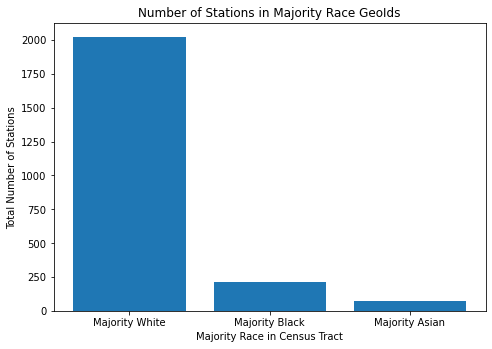

In [11]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
y = ['Majority White', 'Majority Black', 'Majority Asian']
x = [w_major.num_stations.sum(), b_major.num_stations.sum(), a_major.num_stations.sum()]
plt.bar(y,x)
plt.title('Number of Stations in Majority Race GeoIds')
plt.xlabel('Majority Race in Census Tract')
plt.ylabel('Total Number of Stations')
plt.show()

This graph studies the total number of stations in all of the majority race census tracts. From what we can see here, there is a far larger number of stations in majority white census tracts at around 2000 stations. On the other hand, the total number of stations for majority black and majority asian geoids are signficantly smaller in comparison. 

While useful in providing an initial picture of stations in race-specific census tracts, it doesn't give us a good look at the relationship between white, asian, and black populations with number of stations individually. Since from this graph it would seem that majority white geoids are much more prevalant, let's first study the dynamics between each race group with white percentage in conjunction with number of stations.  

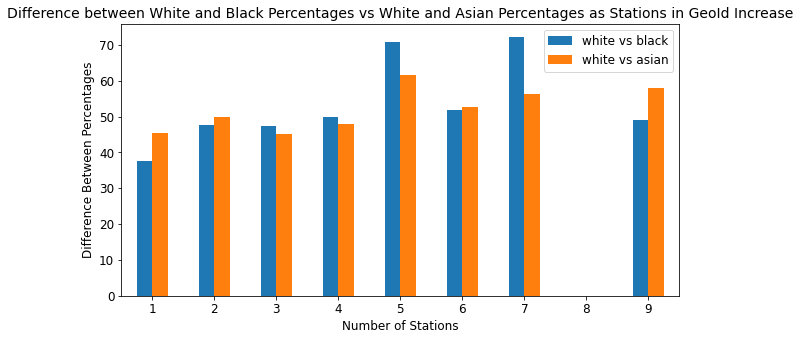

,white vs black,white vs asian
1,37.577707,45.459511
2,47.531978,50.015528
3,47.314306,45.193113
4,49.936631,48.018711
5,70.860847,61.509097
6,51.924545,52.594756
7,72.222256,56.228695
8,0.000000,0.000000
9,49.090909,57.892562


In [12]:
df['white vs black'] = df['White Percentage'] - df['Black Percentage']
df['white vs asian'] = df['White Percentage'] - df['Asian Percentage']
df['station_number'] = [1,2,3,4,5,6,7,8,9]
df.plot.bar(x = 'station_number', y = ['white vs black','white vs asian'],figsize=(10,5), fontsize = 12, rot = 0)

plt.legend(fontsize =12)
plt.xlabel('Number of Stations', fontsize = 12)
plt.ylabel('Difference Between Percentages', fontsize = 12)
plt.title('Difference between White and Black Percentages vs White and Asian Percentages as Stations in GeoId Increase', fontsize = 14)
plt.show()
df.loc[:,'white vs black':'white vs asian']

The earlier graph focused on number of stations by majority race. In order to study the racial dynamics more clearly, we will take the difference between the white vs asian and black percentages to see whether white percentages do increase as the number of stations in a geoid increases. This would imply that higher white percentages and lower asian and black percentages in a geoid are more likely to have more stations. 

From what we can see here, there is a general trend that the difference between white versus asian and white vs black populations increases as the number of stations in the geoid increases. That being said, the difference between percentages are not as high for asian percentages. For example, at 7 stations, the difference between the average white percentage and asian percentage is 56 percent. On the other hand, the difference between black and white percentages is 72 percent. 

Because we can see here that the difference between white and other races hovers around 40 percent, we did not look at the difference between asian vs black populations. This likely would have yielded very small numbers. Moreover, we wanted specifically to look at further into white percentage and number of stations.

This graph would imply that larger numbers of stations are generally placed in areas with higher white percentages. However, because this relationship cannot be confirmed through this graph alone, let's model the relationship.

In [13]:
num_stations = race_st_df['num_stations']
percentile = np.percentile(num_stations, 50)
race_st_df['above_median_station'] = np.where(race_st_df['num_stations']>= percentile, True, False)

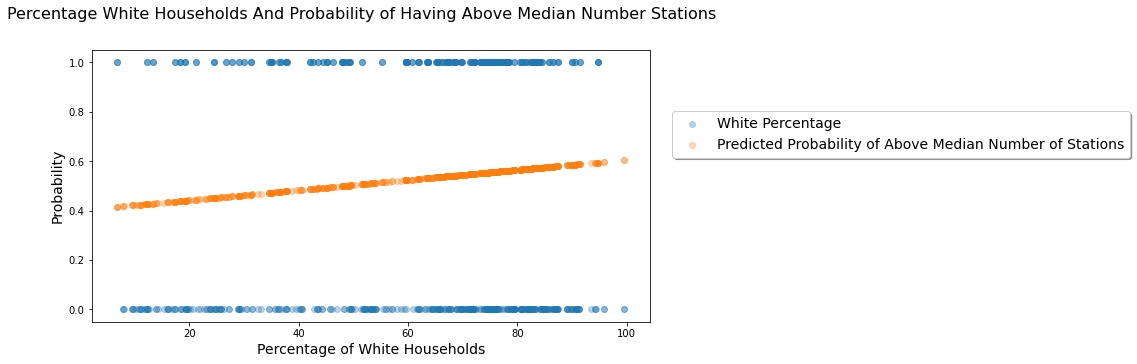

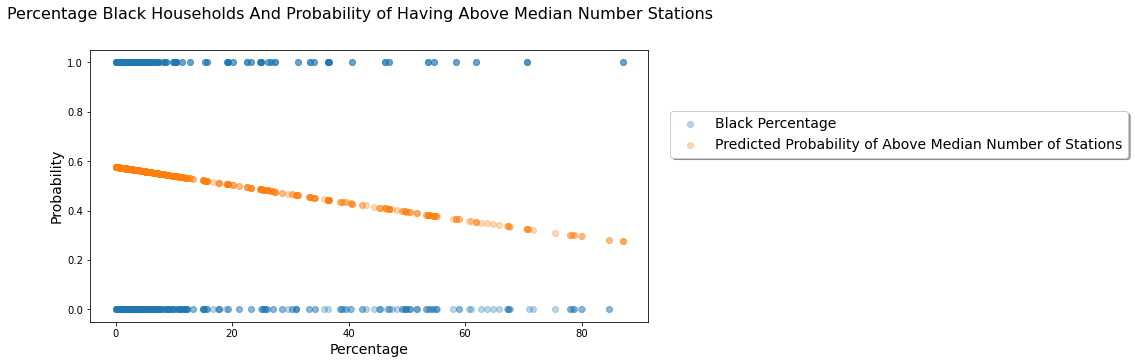

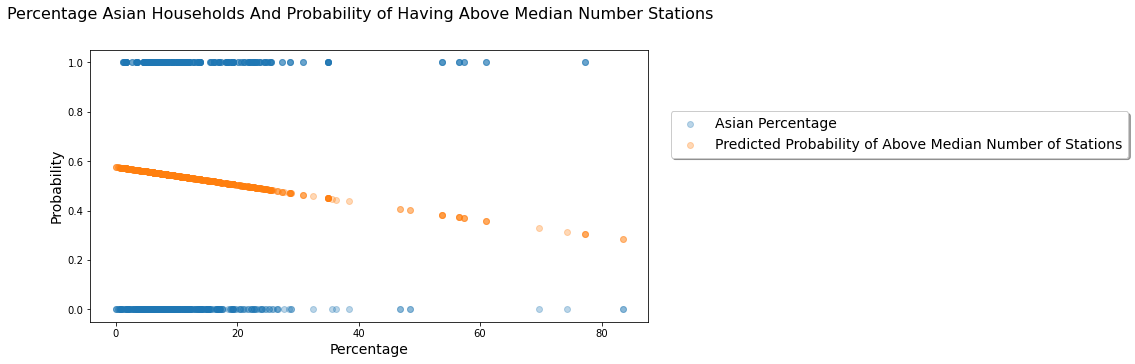

R^2 value of Black Percentage and Above Median Stations: 0.56
R^2 value of White Percentage and Above Median Stations: 0.54
R^2 value of Asian Percentage and Above Median Stations: 0.53


In [14]:
racevsstations_w = LogisticRegression().fit(race_st_df[['white_pct']],race_st_df['above_median_station'])
predict_num_stations_w = racevsstations_w.predict(race_st_df[['white_pct']])

racevsstations_w.predict_proba(np.array([[50]]))
racevsstations_w.predict(np.array([[50]]))
# Logistic Regression for Black Percentages and Above Median Number Stations
fig = plt.figure(figsize = (10,5))

plt.scatter(
    race_st_df.white_pct, 
    race_st_df.above_median_station, 
    alpha = 0.3,
    label='White Percentage'
)
plt.scatter(
    race_st_df.white_pct, 
    racevsstations_w.predict_proba(race_st_df[['white_pct']])[:,1], 
    alpha = 0.3,
    label='Predicted Probability of Above Median Number of Stations'
)
plt.legend(loc='upper center', bbox_to_anchor=(1.45, 0.8), shadow=True, ncol=1, fontsize = 14)
plt.xlabel("Percentage of White Households", fontsize = 14)
plt.ylabel("Probability", fontsize = 14)
plt.suptitle('Percentage White Households And Probability of Having Above Median Number Stations', size=16, y=1);      
plt.show()
# Logistic Regression for Black Percentages and Above Median Number Stations

racevsstations_b = LogisticRegression().fit(race_st_df[['black_pct']],race_st_df['above_median_station'])
predict_num_stations_b = racevsstations_b.predict(race_st_df[['black_pct']])
fig = plt.figure(figsize = (10,5))

plt.scatter(
    race_st_df.black_pct, 
    race_st_df.above_median_station, 
    alpha = 0.3,
    label='Black Percentage'
)
plt.scatter(
    race_st_df.black_pct, 
    racevsstations_b.predict_proba(race_st_df[['black_pct']])[:,1], 
    alpha = 0.3,
    label='Predicted Probability of Above Median Number of Stations'
)
plt.legend(loc='upper center', bbox_to_anchor=(1.45, 0.8), shadow=True, ncol=1 ,fontsize = 14)
plt.xlabel("Percentage", fontsize = 14)
plt.ylabel("Probability", fontsize = 14)
plt.suptitle('Percentage Black Households And Probability of Having Above Median Number Stations', size=16, y=1);      
plt.show()

#Logistic Regression for Asian Percentages and Above Median Number Stations
racevsstations_a = LogisticRegression().fit(race_st_df[['asian_pct']],race_st_df['above_median_station'])
predict_num_stations_a = racevsstations_a.predict(race_st_df[['asian_pct']])
fig = plt.figure(figsize = (10,5))

plt.scatter(
    race_st_df.asian_pct, 
    race_st_df.above_median_station, 
    alpha = 0.3,
    label='Asian Percentage'
)
plt.scatter(
    race_st_df.asian_pct, 
    racevsstations_b.predict_proba(race_st_df[['asian_pct']])[:,1], 
    alpha = 0.3,
    label='Predicted Probability of Above Median Number of Stations'
)
plt.legend(loc='upper center', bbox_to_anchor=(1.45, 0.8), shadow=True, ncol=1 ,fontsize = 14)
plt.xlabel("Percentage", fontsize = 14)
plt.ylabel("Probability", fontsize = 14)
plt.suptitle('Percentage Asian Households And Probability of Having Above Median Number Stations', size=16, y=1);      
plt.show()


b_r_sqr = racevsstations_b.score(race_st_df[['black_pct']],race_st_df['above_median_station'])
print('R^2 value of Black Percentage and Above Median Stations:', round(b_r_sqr,2))

w_r_sqr = racevsstations_w.score(race_st_df[['white_pct']],race_st_df['above_median_station'])
print('R^2 value of White Percentage and Above Median Stations:', round(w_r_sqr,2))

a_r_sqr = racevsstations_a.score(race_st_df[['asian_pct']],race_st_df['above_median_station'])
print('R^2 value of Asian Percentage and Above Median Stations:', round(a_r_sqr,2))

Because the number of stations is discrete data and not continous data, we decided to utilize logistic regression instead of linear regression. In order to prepare for the logistic regression, we added a column to the dataframe that classifies whether the geoid had above the median number of stations or not. In these three graphs, we're looking at the percentage of each race, asian, white, and black, in a census tract and the probability of that census tract having above the median, 3, number of stations. 

In the first graph, the predicted probability seems to have a positive slope. This indicates that census tracts with higher white percentages have a greater probability of having more than 3 stations. On the other hand, the second graph shows a decreasing probability as the black percentage in a geoid increases. These graphs confirm what we've seen before where white populations have a positive relationship with the number of stations. 

In the third graph, the asian percentage also displays a similar relationship as the black percentage in the second graph. That being said, it would seem that the asian population composes a very small percentage of NYC as a whole. Therefore, there are not as many geoids with a majority asian population as there are for black and white populations as indicated by the sparse dots in the third graph.

Both predictor models are fairly good since they explain around 54 percent of the data. These three graphs confirm the trend that we've seen so far. The lower the percentage the white population is in a census tract, the less likely it is that there is a high number of stations. Therefore, it is likely that more stations are being placed in white areas.

Since we've now confirmed that there is a relationship between race and number of stations, we should look into other factors that may play a role. One such component that could affect station placement is the income of a geoid.

## Income

During Citi Bike's initial expansion into NYC, it was placed in relatively high income areas to ensure its usage <cite>[Wenya et. al.][1]</cite>. This is because an annual membership to Citi Bike costs an annual amount of 169 dollars<cite> [NYTimes] [2]</cite>. This cost can be prohibitive to many communities.

However, Citi Bike also has a program that allows public housing residents and food stamp users to buy a membership at 60 dollars a year <cite>[2]</cite>. With these two factors regarding cost in mind, it's important to study whether station placement allows residents from different income brackets to utilize Citi Bike.

[1]:https://www.researchgate.net/publication/328756164_The_Cost-Effectiveness_of_Bike_Share_Expansion_to_Low-Income_Communities_in_New_York_City
[2]:https://www.nytimes.com/2019/07/16/nyregion/citi-bike-nyc-bronx.html

In [19]:
income = race_st_df['2017_median_income']
race_st_df['2017_median_income'].describe()
df_income = DataFrame (w_list,columns=['White Percentage'])

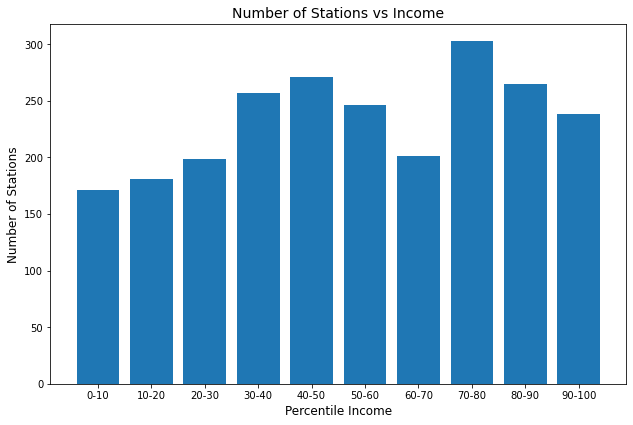

In [20]:
tenth = race_st_df[(race_st_df['2017_median_income']> 13207) & (race_st_df['2017_median_income']<np.percentile(income, 10))].num_stations.sum()
bw_10_20 = race_st_df[(race_st_df['2017_median_income']> np.percentile(income, 10)) & (race_st_df['2017_median_income']<=np.percentile(income, 20))].num_stations.sum()
bw_20_30 = race_st_df[(race_st_df['2017_median_income']> np.percentile(income, 20)) & (race_st_df['2017_median_income']<=np.percentile(income, 30))].num_stations.sum()
bw_30_40 = race_st_df[(race_st_df['2017_median_income']> np.percentile(income, 30)) & (race_st_df['2017_median_income']<=np.percentile(income, 40))].num_stations.sum()
bw_40_50 = race_st_df[(race_st_df['2017_median_income']> np.percentile(income, 40)) & (race_st_df['2017_median_income']<=np.percentile(income, 50))].num_stations.sum()
bw_50_60 = race_st_df[(race_st_df['2017_median_income']> np.percentile(income, 50)) & (race_st_df['2017_median_income']<=np.percentile(income, 60))].num_stations.sum()
bw_60_70 = race_st_df[(race_st_df['2017_median_income']> np.percentile(income, 60)) & (race_st_df['2017_median_income']<=np.percentile(income, 70))].num_stations.sum()
bw_70_80 = race_st_df[(race_st_df['2017_median_income']> np.percentile(income, 70)) & (race_st_df['2017_median_income']<=np.percentile(income, 80))].num_stations.sum()
bw_80_90 = race_st_df[(race_st_df['2017_median_income']> np.percentile(income, 80)) & (race_st_df['2017_median_income']<=np.percentile(income, 90))].num_stations.sum()
bw_90_100 = race_st_df[(race_st_df['2017_median_income']> np.percentile(income, 90)) & (race_st_df['2017_median_income']<=np.percentile(income, 100))].num_stations.sum()
fig = plt.figure(figsize = (8,5))
ax = fig.add_axes([0,0,1,1])
y = ['0-10','10-20', '20-30', '30-40','40-50','50-60','60-70','70-80','80-90','90-100']
x = [tenth, bw_10_20, bw_20_30, bw_30_40, bw_40_50, bw_50_60, bw_60_70, bw_70_80, bw_80_90, bw_90_100]
plt.bar(y,x)
plt.title('Number of Stations vs Income', fontsize = 14)
plt.xlabel('Percentile Income', fontsize = 12)
plt.ylabel('Number of Stations', fontsize = 12)
plt.show()

This graph studies the total number of stations based on the census tract's percentile of median income. By looking at each 10th percentile of income, we can look at whether there is an overall relationship between income percentile and station placement in census tracts. 

In this graph, it would seem that there's a general trend of increasing number of stations at higher percentiles of income. At the zero to 10 percentile, the total number of stations is around 175. On the other hand, at the 70 to 80 percentile income level, the number of stations is around 300. That being said, there are a few anomolies, which do not allow us to definitively conclude that higher income and higher number of stations have a positive relationship. In order to further analyze and to confirm this trend, we will be using a model.

## Logistic Regression

In [ ]:
incomevsstations = LogisticRegression().fit(race_st_df[['2017_median_income']],race_st_df['above_median_station'])
predict_num_stations_income = incomevsstations.predict(race_st_df[['2017_median_income']])

incomevsstations.predict_proba(np.array([[50]]))
incomevsstations.predict(np.array([[50]]))
fig = plt.figure(figsize = (10,8))

# Plotting the probability of above median stations vs. income
plt.scatter(
    race_st_df['2017_median_income'], 
    race_st_df.above_median_station, 
    alpha = 0.3,
    label='Above Median Number of Stations'
)
plt.scatter(
    race_st_df['2017_median_income'], 
    incomevsstations.predict_proba(race_st_df[['2017_median_income']])[:,1], 
    alpha = 0.3,
    label='Predicted above average number of stations'
)
plt.legend(loc='upper center', bbox_to_anchor=(1.45, 0.5),fontsize = 16, shadow=True, ncol=1)
plt.xlabel("Income", fontsize = 20)
plt.ylabel("Probability", fontsize = 20)
plt.suptitle('2017 Median Income and And Probability of Above 50th Percentile Stations', size=20, y=1);      
plt.show()
income_sqr = incomevsstations.score(race_st_df[['2017_median_income']],race_st_df['above_median_station'])
print('The r^2 value of median income and number of stations:', round(income_sqr,2))

In order to further study and confirm the relationship we've observed between income and number of stations, we decided to do a logistic regression. This is because, as with studying race and number of stations, the number of stations are descrete values, which prevents us from utilizing linear regression. Moreover, the number of stations is not dependent on income just on its own, so a linear model would not be applicable here. 

This graph looks at the median income of census tracts and their predicted probability of having an above median number of stations. It would seem that at the lower levels of income, the probability of having an above median number of stations is around .5. However, as the income within a census tract increases, the probability slowly increases as well. This indicates that at higher income levels, there is a greater probability of having larger number of stations. And because the r^2 value is .53, the prediction model explains 53% of the data which is fairly good.

Now that we've seen race and income separately, we should look at their relationship in conjunction with stations. 

In [ ]:
from sklearn.metrics import classification_report
X = race_st_df[['2017_median_income','white_pct','black_pct','asian_pct']]
income_race_stations = LogisticRegression().fit(X,race_st_df['above_median_station'])
predict_race_income = income_race_stations.predict(race_st_df[['2017_median_income','white_pct','black_pct','asian_pct']])
print('R^2:',round(income_race_stations.score(X, race_st_df['above_median_station']),2))
print('Coefficients:', income_race_stations.coef_)
print('Intercept:', income_race_stations.intercept_)
class_report=classification_report(race_st_df['above_median_station'], predict_race_income)
print(class_report)

### Main Statements

rq : how is citibike representing NYC demographics? 


a1 : trips vs stations

Trips cannot predict stations! Station placement is affected by sth else! 


a2: race/income vs stations

There is a relationship between race/income and stations! 


after a1, a2 we need to answer the question of where citibike should be distributed more. 


A3: trips vs race/income
→ white/high income take more trips? (check) 
→ bar graph: looking at both trips and stations  checking fairness by race

→ population normalizaiton




(evalsig)
- A1: permutation trips vs stations really no relationship!
- A2: (sth) to say there is a significant relationship btw race/income and stations
        - could be the lineargraph but should be more straight forward. 


(conclusion)
- interms of race/income not representing NYC demographics well (explain nummerically with graphs)
- in terms of trips not representing NYC demographics well(explain nummerically with graphs)
- seems to be stations located in parks. But the usage of those stations are not that high at all so there isn't a fair distribution (explain nummerically with graphs)

(proposal)
- in what geoids should there be more stations? 
    - single out places that have minority race/incoem and 
- other things citibike can do
    - shrink cost of usage
    - ~~~ safer roads

## Evaluation of Significance 

#### Trips vs Stations

In [ ]:
## Your solution here
sns.relplot(x="Number of Stations", y="Number of Trips", data=trips_start_df)
plt.xlabel("Number of Stations")
plt.ylabel("Number of Trips")
plt.title("Number of Stations vs Number of Trips Scatterplot")
plt.show()


When we compute a scatterplot based on the relationship between stations and the number of trips, we were able to see that it is unclear whether there is a direct relationship between the number of stations and the number of trips. Overall we can see that that more trips tend to have more stations but there are instance where this is not true. 

To address this issue, we will set a hypothesis and conduct permutation to test whether the pattern of having more trips in places with more stations is outside the range of values we might reasonably expect to get by chance. 

#### Permutation Testing

In [ ]:
trips_df.head()

In [ ]:
# group by start stations and count number of trips
trips_start_df = trips_df.groupby(['start_station_geoid']).size().reset_index(name = 'num_trips')
trips_start_df = trips_start_df.sort_values('num_trips', ascending=False)
trips_start_df = trips_start_df.rename(columns={'start_station_geoid': 'geoid'})
trips_start_df.head()

In [ ]:
stations = pd.read_csv('../data/citibike_stations_final.csv')

#group by geoid and count number of stations
stations_geoid = stations.groupby(['geoid']).size().reset_index(name = 'num_stations')
stations_geoid = stations_geoid.sort_values('num_stations', ascending=False)

## Number of Stations at each geoid
trips_start_df= pd.merge(stations_geoid,trips_start_df,  on=['geoid'], how='inner')
trips_start_df.head()

1. x = num_stations
2. y = num_trips

In [ ]:
def permute(input_array):
    # shuffle is inplace, so copy to preserve input
    permuted = input_array.copy()
    np.random.shuffle(permuted)
    return permuted

In [ ]:
permute(trips_start_df['num_trips'])

In [ ]:
# plot one instance of permuted data
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(12,6), sharey=True)
sns.regplot(x=trips_start_df.num_stations, y=trips_start_df.num_trips, ax=ax1)
ax1.set_title('True data')
sns.regplot(x=trips_start_df.num_stations, y=permute(trips_start_df.num_trips), ax=ax2)
ax2.set_title('Permuted data')
plt.show()

In [ ]:
def plot_model_line(df, model, is_resampled=True):
    '''
    Takes a dataframe and a fitted model
    Plots a line of best fit to the data
    '''
    if is_resampled:
        color="grey"
        alpha=0.1
    else:
        color="steelblue"
        alpha=0.7
    plt.plot(df['num_stations'], df['num_stations'] * model.coef_[0] + model.intercept_, color=color, alpha=alpha)

In [ ]:
# plot true data
plt.scatter(trips_start_df['num_stations'], trips_start_df['num_trips'])

# plot 100 iterations of models on permuted data
for i in range(100):
    fake_model = LinearRegression().fit(trips_start_df[['num_stations']], permute(trips_start_df['num_trips']))
    plot_model_line(trips_start_df, fake_model)

# model true data and plot
model = LinearRegression().fit(trips_start_df[['num_stations']], trips_start_df['num_trips'])
plot_model_line(trips_start_df, model, is_resampled=False)
    
plt.xlabel('num_stations')
plt.ylabel('num_trips')
    
plt.show()


In [ ]:
# what's up with the point of convergence in all the models?
print(trips_start_df.num_stations.mean(), trips_start_df.num_trips.mean())

In [ ]:
%%time
# how many permuted (null hyopthesis) slopes are greater than our observed slope?
steeper_slopes = 0
n_permutations = 10000
permuted_slopes = np.zeros(n_permutations)

for i in range(n_permutations):
    fake_model = LinearRegression().fit(trips_start_df[['num_stations']], permute(trips_start_df.num_trips))
    
    permuted_slopes[i] = fake_model.coef_[0]
    
    if np.abs(fake_model.coef_[0]) > np.abs(model.coef_):
        steeper_slopes += 1
    
print(steeper_slopes / n_permutations)

In [ ]:
steeper_slopes

The result of our permutation shows that there are no steeper slopes that are greater than our observed slope. This means that it is impossible to conclude that having more trips in places with more stations is outside the range of values we might reasonably expect to get by chance. 
We can visualize this again by creating a graph.

In [ ]:
# plot where our observed slope falls in the distribution 
#  of slopes under the null hypothesis
binsizes, _, _ = plt.hist(permuted_slopes, bins=50)
plt.vlines(model.coef_[0], ymin=0, ymax=np.max(binsizes), color='red')
plt.show()

In [ ]:
from   sklearn.model_selection import train_test_split
import statsmodels.formula.api as smf

In [ ]:
sm_model = smf.ols("num_trips ~ num_stations", data=trips_start_df)
result = sm_model.fit()
result.summary()

Overall, from the linear regression too, we can see that there is a very small p-value. This means we reject the null hypothesis that more stations will lead to more trips. In our next step, we will look at permutation by the each number of stations with relation to the number of trips

**Additional things to look at**
- How race/income and citibike stations placement is changing throughout the years. 
- permutation by columns. with race/income included.

## Interpretation and Conclusion 

Over the course of our project, we've found several pieces of evidence that indicate the complexity of factors that are involved in citibike placement in NYC. First, we found evidence that geoids with a high number of stations had lower numbers of trips. 

This led us to investigating the specific demographics of those areas and researching more into the specific demographics of NYC in conjunction with station placement based on geoid. We found that census tracts with majority white households had a consistently high number of stations when compared to other racial groups. This is consistent with what we found for the geo ids with seven or more stations. Moreover, we found that census tracts with higher income also consistently had a high number of stations. This indicates a racial and income disparity in Citibike station placement. In order to confirm this trend, we looked further into the demographics of citibike users based on trip data. 

From this trip data, we found that Citibike's placement in predominantly white area is logical given the fact that it would appear that predominantly black census tracts are less likely to utilize Citibike. However, because this could be due simply to the higher number of Citibike stations in these areas, we decided to normalize the data. We normalized the data by dividing the number of trips by the number of stations. When using this normalized data, we found that predominantly asian areas had a high number of trips per station. This indicates that Citibike's placement is not meeting the demand of these Asian census tracts. 

Moreover, our research in Citibike creation indicates that while Citibike does address the need for Citibike stations in white areas, they are not doing as well for black and asian areas. Specifically, areas with a predominantly asian population indicate that Citibike is not meeting the needs of these areas. 

These findings indicate that as of 2017 Citibike has needed to make a substantial effort in building more stations in poor and non-white areas. This has been supported by Citibike's recent expansion in 2020, which has added 36 new stations. 



## Limitations

### Overall Limitations

- We acknowledge that race and income are not the only factors that contribute to the distribution of citibike stations around NYC. We are trying to see if there is a correlations for race and income with the distribution of citibike stations. 

- Since our data is based off of citibikes in 2017, our results are limited to that year only. That being said, they may be an indicator of how citibike stations are distributed for other years as well.

### Citi Bike Trip Data Limitations

- The trip data **only includes the 'Subscribers' of the users**. Though there may be some one-time-customer passes from NYC residents, due to the large amount of data we decided to settle on subscribers only because there was a higher chance that these people were actually new york city residents. So our data may not be representative of other NYC residents that may have only used one-time passes. 

- We dropped rows where start station = end station. When the start station = end station we assumed that there would probably we a majority of cases where people where having trouble with using citibike in the inital process. However, **there may be cases where people would have been able to make complete round trips and returned them back to the same location in for some of the trips where the start station = end station**

### Citi Bike Stations Data Limitations

- One possible limitation of this station data set is that the **count of the number of trips taken from a station is actually the count up to the end of 2019, whereas our project focuses on 2017**. However, there is a workaround for this problem since we also have the trip data, we can just recalculate the number of trips taken from each station up to the end of 2017. 

- Another limitation is that **the station start date is not actually the date the station was added to the network but is instead the date at which the first trip was taken from the station**, which might not always be the same.

### Race and Income Data Limitations

- One possible limitation of this data set is that **it only looks at survey data from 2017**. However, this is also consistent with the current data available on the American Community Survey website. Currently, the survey website data is only updated up until 2017. Because of this limitation, there may not be potential inaccuracies with representation in the data.

- Moreover, populations like the homeless or digital nomads may not be recorded in the data. That being said, the survey itself was collected using this method in order to avoid bias in the data. 

## Source Code 


1) Lecture Notes: https://colab.research.google.com/drive/1pMK18-DQoBDA_9rSzio6LJtkCJWxJF1g?usp=drive_open#scrollTo=6p2-tZKgM4He

2) Stack Overflow, Pandas, Matplotlib Documentation  : 

    -  https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.xlabel.html
    -  https://stackoverflow.com/questions/11346283/renaming-columns-in-pandas

## Acknowledgements

1) MIT Citibike study :  https://aberke.github.io/income-race-bikes/

2) Equity in Citibike study : https://trec.pdx.edu/research/project/884 

<em>Special Thanks to Professor Wilkens, Head TA Stephen Cowpar, TA ... in helping us answer our research question properly, find methods to solve our problems, and focus on the direction of our study</em>

## Appendix

1) Citibike Trip data Data Cleaning Notebooks : https://github.com/shljessie/citibike-nyc/tree/master/data_cleaning/citibike

2) NYC Race & Income Data Cleaning Notebooks : https://github.com/shljessie/citibike-nyc/tree/master/data_cleaning/race_and_income 

3) Citibike Stations Data Cleaning Notebook : https://github.com/shljessie/citibike-nyc/tree/master/data_cleaning/stations

4) Citibike Data Cleaning process Phase 2 : https://github.com/shljessie/citibike-nyc/blob/master/project_phase_submissions/phase2_final_notebook.ipynb

<!-- 5) Citibike Trip Data Additional Cleaning :  -->